In [1]:
data <- c(994, 997, 999, 1003, 994, 998, 1001, 998, 996, 1002, 1004, 995, 994, 995, 998, 1001,
          995, 1006, 997, 998)

Let the prior distribution $\mathbb{P}(\mu|I)$ be uniform in $[991, 1010]\mathrm{g}$. Given the available data, the posterior distribution is given by:

$$\mathbb{P}(\mu|\mathrm{data},I) = \frac{1}{Z} \mathbb{P}(\mathrm{data}|\mu,I) \mathbb{P}(\mu|I) $$
where $Z$ is the normalization constant.

The likelihood function $\mathbb{P}(\mathrm{data}|\mu,I)$, assuming the data $x_i$ are independent, is a product of gaussians:
$$\mathbb{P}(\mathrm{data}|\mu,I) = \prod_i \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2} \left( \frac{x_i - \mu}{\sigma} \right)^2 \right) $$
where, in our case, $\sigma^2 = 9\>\mathrm{g}^2$.

In [2]:
sigma <- sqrt(9)

#Unnormalized prior
prior <- function(x) {
    ifelse(x >= 991 & x <= 1010, 1, 0)
}

#Likelihood
likelihood <- function(mu) {
    like <- 1
    
    for (d in data) {
        like <- like * dnorm(d, mu, sd = sigma)
    }
    
    return(like)
}

In [3]:
mu.val <- seq(from=991, to=1010, length.out=500)
mu.diff <- mu.val[2] - mu.val[1]

posterior <- prior(mu.val) * likelihood(mu.val)

#Normalize
posterior <- posterior / ( sum(posterior) * (mu.diff) )


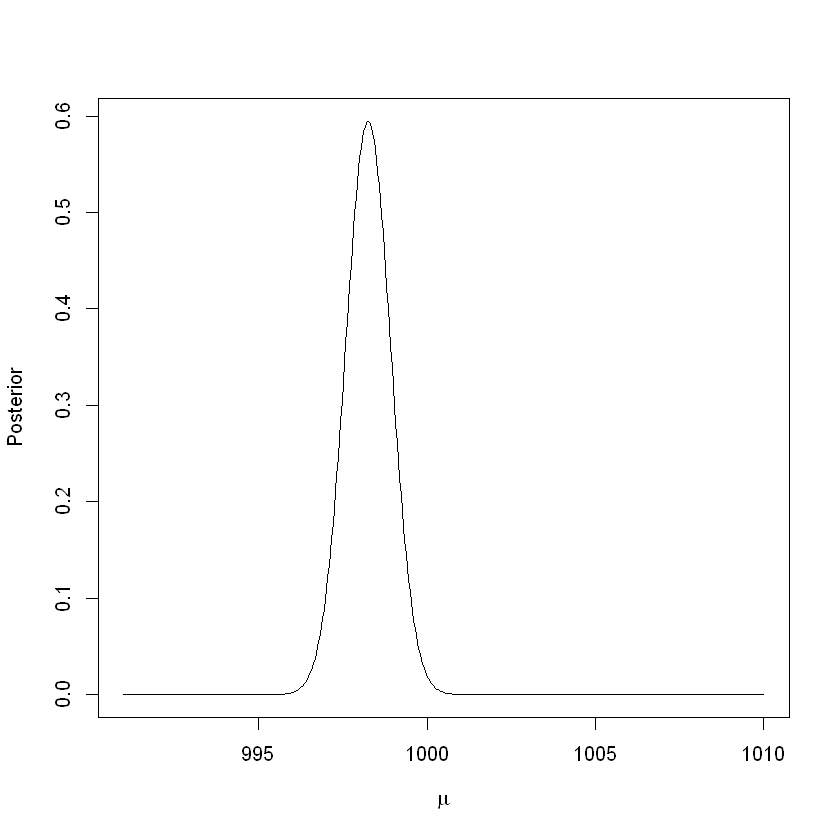

In [17]:
plot(mu.val, posterior, "l", xlab=expression(mu), ylab="Posterior")

In [5]:
ind <- tail(which(mu.val < 1000), n=1)

In [6]:
sum(posterior[1:ind]) * (mu.diff) #Probability of mu < 1000

[1] 0.995559